In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e6dfc51d68>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1}

In [11]:
first_row2 = session.query(Station).first()
first_row2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1e6dfc69a20>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [12]:
for row in session.query(Measurement.id,Measurement.date,Measurement.station,Measurement.prcp).limit(15).all():
    print(row)

(1, '2010-01-01', 'USC00519397', 0.08)
(2, '2010-01-02', 'USC00519397', 0.0)
(3, '2010-01-03', 'USC00519397', 0.0)
(4, '2010-01-04', 'USC00519397', 0.0)
(5, '2010-01-06', 'USC00519397', None)
(6, '2010-01-07', 'USC00519397', 0.06)
(7, '2010-01-08', 'USC00519397', 0.0)
(8, '2010-01-09', 'USC00519397', 0.0)
(9, '2010-01-10', 'USC00519397', 0.0)
(10, '2010-01-11', 'USC00519397', 0.01)
(11, '2010-01-12', 'USC00519397', 0.0)
(12, '2010-01-14', 'USC00519397', 0.0)
(13, '2010-01-15', 'USC00519397', 0.0)
(14, '2010-01-16', 'USC00519397', 0.0)
(15, '2010-01-17', 'USC00519397', 0.0)


In [13]:
session.query(func.count(Measurement.date)).all()

[(19550)]

In [14]:
# Figuring out the latest data in database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

# Exploratory Climate Analysis

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data
data = pd.read_sql("SELECT * FROM Measurement", conn)
data = data.sort_values(by=['date'],ascending = 'True')
mask = (data['date'] >= '2016-08-23') & (data['date'] <= '2017-08-23')
df = data.loc[mask]
df.set_index('date')

,id,station,prcp,tobs
date,,,,
2016-08-23,8825,USC00517948,NaN,80.0
2016-08-23,2364,USC00519397,0.00,81.0
2016-08-23,19202,USC00516128,0.70,74.0
2016-08-23,14608,USC00519281,1.79,77.0
2016-08-23,11851,USC00519523,0.02,80.0
2016-08-23,5091,USC00513117,0.15,76.0
2016-08-23,7331,USC00514830,0.05,80.0
2016-08-24,19203,USC00516128,1.45,74.0
2016-08-24,2365,USC00519397,0.08,79.0


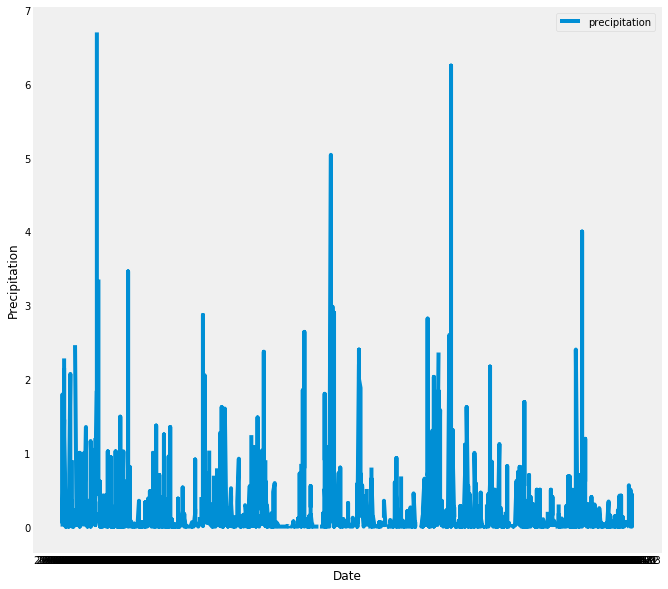

In [16]:
# Plotting the data
plt.figure(figsize=(10,10))
plt.plot(df['date'], df['prcp'])
plt.xlabel("Date")
plt.ylabel("Precipitation")
L = plt.legend(loc='upper right')
L.get_texts()[0].set_text('precipitation')
plt.grid()
plt.show()


![precipitation](Images/precipitation.png)

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df['prcp'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

![describe](Images/describe.png)

In [18]:
# Design a query to show how many stations are available in this dataset?
data['station'].nunique()

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
data['station'].value_counts()

USC00519281    2772
USC00519397    2724
USC00513117    2709
USC00519523    2669
USC00516128    2612
USC00514830    2202
USC00511918    1979
USC00517948    1372
USC00518838     511
Name: station, dtype: int64

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
df1 = data.loc[data['station'] == 'USC00519281']
df1['tobs'].min()


54.0

In [21]:
df1['tobs'].max()

85.0

In [22]:
df1['tobs'].mean()

71.66378066378067

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df2 = data.loc[data['station'] == 'USC00519281']
df2['date'].max()


'2017-08-18'

In [24]:
# Obtaining the last 12 months of data for station USC00519281
mask1 = (df2['date'] >= '2016-08-18') & (df2['date'] <= '2017-08-18')
df3 = df2.loc[mask1]
df3

,id,station,date,prcp,tobs
14602,14603,USC00519281,2016-08-18,0.00,80.0
14603,14604,USC00519281,2016-08-19,0.31,79.0
14604,14605,USC00519281,2016-08-20,0.13,81.0
14605,14606,USC00519281,2016-08-21,0.08,79.0
14606,14607,USC00519281,2016-08-22,2.32,78.0
14607,14608,USC00519281,2016-08-23,1.79,77.0
14608,14609,USC00519281,2016-08-24,2.15,77.0
14609,14610,USC00519281,2016-08-25,0.06,80.0
14610,14611,USC00519281,2016-08-26,0.01,80.0
14611,14612,USC00519281,2016-08-27,0.12,75.0


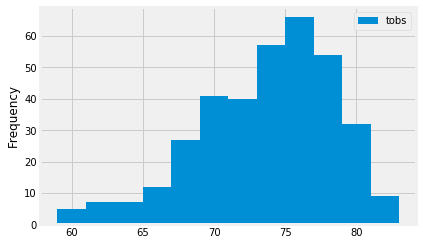

In [25]:
df3['tobs'].plot.hist(alpha=1,bins = 12)
plt.legend()

![precipitation](Images/station-histogram.png)

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# My trip to Hawaii is from '2018-02-20' till '2018-03-08'
print(calc_temps('2017-02-20', '2017-03-08'))

[(61.0, 70.28571428571429, 78.0)]


Text(0,0.5,'Temp (F)')

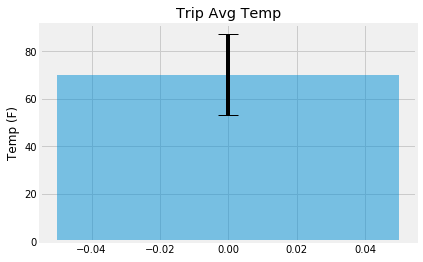

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
a = calc_temps('2017-02-20', '2017-03-08')
a = [61,70.28571428571429,78]
fig, ax = plt.subplots()
error = a[2] - a[0]
ax.bar(0, 70.28571428571429,width = 0.1, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.title("Trip Avg Temp")
plt.ylabel("Temp (F)")


In [29]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
data1 = pd.read_sql("SELECT * FROM Station", conn)
mask2 = (data['date'] >= '2017-02-20') & (data['date'] <= '2017-03-08')
df4 = data.loc[mask2]
merge_table = pd.merge(df4, data1, on="station", how="outer")
k = merge_table[["station","date","prcp","name","latitude","longitude","elevation","tobs"]]
k = k.sort_values("prcp", ascending=False)
k.head()

,station,date,prcp,name,latitude,longitude,elevation,tobs
99,USC00517948,2017-03-01,2.40,"PEARL CITY, HI US",21.39340,-157.97510,11.9,66.0
85,USC00513117,2017-03-01,2.20,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,72.0
9,USC00519281,2017-03-01,2.12,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,71.0
26,USC00516128,2017-03-01,2.00,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,64.0
10,USC00519281,2017-03-02,1.88,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,73.0


In [30]:
#Convert the query results to a Dictionary using `date` as the key and `prcp` as the value. l(dict) is copied to app.py file.
l = k[["date","prcp"]].set_index('date').to_dict()
l

{'prcp': {'2017-03-01': 0.59,
  '2017-03-02': 0.44,
  '2017-02-28': nan,
  '2017-03-03': nan,
  '2017-03-06': nan,
  '2017-03-05': 0.1,
  '2017-02-22': 0.06,
  '2017-02-25': 0.0,
  '2017-02-21': nan,
  '2017-02-23': 0.0,
  '2017-02-24': 0.0,
  '2017-03-04': 0.0,
  '2017-03-08': nan,
  '2017-02-27': nan,
  '2017-03-07': nan,
  '2017-02-20': nan,
  '2017-02-26': nan,
  nan: nan}}

In [31]:
#Return a JSON list of stations from the dataset using flask
list(df4['station'].unique())

['USC00519281',
 'USC00516128',
 'USC00514830',
 'USC00519523',
 'USC00519397',
 'USC00513117',
 'USC00517948']

In [32]:
#query for the dates and temperature observations from a year from the last data point.Return the data using flask.
m = k[["date","tobs"]].set_index('date').to_dict()
m

{'tobs': {'2017-03-01': 73.0,
  '2017-03-02': 73.0,
  '2017-02-28': 72.0,
  '2017-03-03': 73.0,
  '2017-03-06': 67.0,
  '2017-03-05': 70.0,
  '2017-02-22': 72.0,
  '2017-02-25': 61.0,
  '2017-02-21': 71.0,
  '2017-02-23': 73.0,
  '2017-02-24': 70.0,
  '2017-03-04': 77.0,
  '2017-03-08': 67.0,
  '2017-02-27': 69.0,
  '2017-03-07': 67.0,
  '2017-02-20': 71.0,
  '2017-02-26': 67.0,
  nan: nan}}

In [33]:
#When given the start only, calculate `TMIN`, `TAVG`, and `TMAX` for all dates greater than and equal to the start date.
#Jsonify the response and use flask to return the data
mask3 = (data['date'] >= '2017-02-20')
df5 = data.loc[mask3]
start = {'tmin':df5["tobs"].min(),'tavg':df5["tobs"].mean(),'tmax':df5["tobs"].max()}
start

{'tmin': 58.0, 'tavg': 75.39594843462247, 'tmax': 87.0}

In [34]:
#When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` 
#for dates between the start and end date inclusive.Jsonify the response and use flask to return the data
# Dates are from '2018-02-20' till '2018-03-08'. df4 table was already generated before for vacation plans.
end = {'tmin':df4["tobs"].min(),'tavg':df4["tobs"].mean(),'tmax':df4["tobs"].max()}
end

{'tmin': 61.0, 'tavg': 70.28571428571429, 'tmax': 78.0}

## Optional Challenge Assignment

In [35]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [40]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [37]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [38]:
# Plot the daily normals as an area plot with `stacked=False`
